#### 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 모든 행과 열을 확인하고 싶으면 다음의 주석을 해제하면 됩니다.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#### 데이터 불러오기

In [2]:
# 데이터 경로 지정
path_month_4 = "/Users/zaewoo/Downloads/서울시교통관련데이터/차량통행속도/2022년 4월 서울시 차량통행속도.xlsx"
path_month_5 = "/Users/zaewoo/Downloads/서울시교통관련데이터/차량통행속도/2022년 5월 서울시 차량통행속도.xlsx"

# 데이터 불러오기
df_month_4 = pd.read_excel(path_month_4)
df_month_5 = pd.read_excel(path_month_5)

#### 데이터 전처리

In [3]:
# 탐색 구간 지정

# 4월
df_month_4 = df_month_4.loc[((df_month_4["시점명"]=="한강대교남단교차로") &
                            (df_month_4["종점명"]=="한강대교북단교차로")) | 
                            ((df_month_4["시점명"]=="동작대교남단") &
                            (df_month_4["종점명"]=="동작대교북단")) |  
                            ((df_month_4["시점명"]=="반포대교남단") &
                            (df_month_4["종점명"]=="반포대교북단")) | 
                            ((df_month_4["시점명"]=="한남대교남단") & 
                            (df_month_4["종점명"]=="한남대교북단"))]

# 5월
df_month_5 = df_month_5.loc[((df_month_5["시점명"]=="한강대교남단교차로") &
                            (df_month_5["종점명"]=="한강대교북단교차로")) | 
                            ((df_month_5["시점명"]=="동작대교남단") &
                            (df_month_5["종점명"]=="동작대교북단")) |  
                            ((df_month_5["시점명"]=="반포대교남단") &
                            (df_month_5["종점명"]=="반포대교북단")) | 
                            ((df_month_5["시점명"]=="한남대교남단") & 
                            (df_month_5["종점명"]=="한남대교북단"))]

In [4]:
# 탐색 일자 지정
df_month_4 = df_month_4.loc[(df_month_4["일자"] > 20220419)]
df_month_5 = df_month_5.loc[(df_month_5["일자"] < 20220531)]

# 탐색 일자 내 공휴일 제거
df_month_5 = df_month_5[df_month_5["일자"] != 20220505] 

In [5]:
# 탐색 요일 지정
df_month_4 = df_month_4.loc[(df_month_4["요일"] != "토") & (df_month_4["요일"] != "일")]
df_month_5 = df_month_5.loc[(df_month_5["요일"] != "토") & (df_month_5["요일"] != "일")]

data = pd.concat([df_month_4, df_month_5])

In [6]:
# 탐색 일자 구분: 대통령 취임 전과 후로 구분하였습니다.
df_month_5_before = df_month_5.loc[(df_month_5["일자"] < 20220511)]
df_month_5_after = df_month_5.loc[(df_month_5["일자"] > 20220510)]

In [7]:
# 데이터 병합
df_month_4 = pd.concat([df_month_4, df_month_5_before])
df_month_5 = df_month_5_after

In [8]:
# 탐색 구간 별 분석을 위하여 다음과 같이 분류하였습니다.

# 한강대교
hangang_month_4 = df_month_4[df_month_4["시점명"] == "한강대교남단교차로"]
hangang_month_5 = df_month_5[df_month_5["시점명"] == "한강대교남단교차로"]
hangang = pd.concat([hangang_month_4, hangang_month_5])

# 한강대교 - 탐색 시간 지정
hangang_month_4 = hangang_month_4[["일자", "요일", "시점명", "08시", "09시", "10시"]]
hangang_month_5 = hangang_month_5[["일자", "요일", "시점명", "08시", "09시", "10시"]]
hangang = hangang[["일자", "요일", "시점명", "08시", "09시", "10시"]]

# 동작대교
dongjak_month_4 = df_month_4[df_month_4["시점명"] == "동작대교남단"]
dongjak_month_5 = df_month_5[df_month_5["시점명"] == "동작대교남단"]
dongjak = pd.concat([dongjak_month_4, dongjak_month_5])

# 동작대교 - 탐색 시간 지정
dongjak_month_4 = dongjak_month_4[["일자", "요일", "시점명", "08시", "09시", "10시"]]
dongjak_month_5 = dongjak_month_5[["일자", "요일", "시점명", "08시", "09시", "10시"]]
dongjak = dongjak[["일자", "요일", "시점명", "08시", "09시", "10시"]]

# 반포대교
banpo_month_4 = df_month_4[df_month_4["시점명"] == "반포대교남단"]
banpo_month_5 = df_month_5[df_month_5["시점명"] == "반포대교남단"]
banpo = pd.concat([banpo_month_4, banpo_month_5])

# 반포대교 - 탐색 시간 지정
banpo_month_4 = banpo_month_4[["일자", "요일", "시점명", "08시", "09시", "10시"]]
banpo_month_5 = banpo_month_5[["일자", "요일", "시점명", "08시", "09시", "10시"]]
banpo = banpo[["일자", "요일", "시점명", "08시", "09시", "10시"]]

# 한남대교
hannam_month_4 = df_month_4[df_month_4["시점명"] == "한남대교남단"]
hannam_month_5 = df_month_5[df_month_5["시점명"] == "한남대교남단"]
hannam = pd.concat([hannam_month_4, hannam_month_5])

# 한남대교 - 탐색 시간 지정
hannam_month_4 = hannam_month_4[["일자", "요일", "시점명", "08시", "09시", "10시"]]
hannam_month_5 = hannam_month_5[["일자", "요일", "시점명", "08시", "09시", "10시"]]
hannam = hannam[["일자", "요일", "시점명", "08시", "09시", "10시"]]

# 잠수교
# jamsu_month_4 = df_month_4.loc[df_month_4["지점명"] == "잠수교"]
# jamsu_month_5 = df_month_5.loc[df_month_5["지점명"] == "잠수교"]
# jamsu = pd.concat([jamsu_month_4, jamsu_month_5])

# 잠수교 - 탐색 시간 지정
# jamsu_month_4 = jamsu_month_4[["8시", "9시", "10시"]]
# jamsu_month_5 = jamsu_month_5[["8시", "9시", "10시"]]
# jamsu = jamsu[["8시", "9시", "10시"]]

In [9]:
# 탐색 시간 지정
data = data[["일자", "요일", "시점명", "08시", "09시", "10시"]]
df_month_4 = df_month_4[["일자", "요일", "시점명", "08시", "09시", "10시"]]
df_month_5 = df_month_5[["일자", "요일", "시점명", "08시", "09시", "10시"]]

#### 결과 확인

In [11]:
# 전체 데이터의 결과 수치 확인
print(data[["08시", "09시", "10시"]].mean())
print(df_month_4[["08시", "09시", "10시"]].mean())
print(df_month_5[["08시", "09시", "10시"]].mean())

08시    42.581607
09시    34.996964
10시    38.107500
dtype: float64
08시    42.379643
09시    34.839643
10시    37.659643
dtype: float64
08시    42.783571
09시    35.154286
10시    38.555357
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


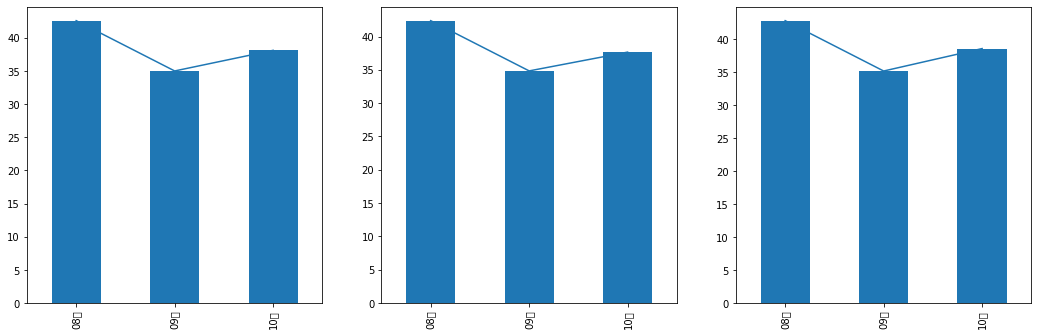

In [31]:
# 전체 데이터의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(data[["08시", "09시", "10시"]].mean())
print(data[["08시", "09시", "10시"]].mean().plot.bar())
plt.subplot(232)
plt.plot(df_month_4[["08시", "09시", "10시"]].mean())
print(df_month_4[["08시", "09시", "10시"]].mean().plot.bar())
plt.subplot(233)
plt.plot(df_month_5[["08시", "09시", "10시"]].mean())
print(df_month_5[["08시", "09시", "10시"]].mean().plot.bar())

In [21]:
# 한강대교의 결과 수치 확인
print(hangang_month_4[["08시", "09시", "10시"]].mean())
print(hangang_month_5[["08시", "09시", "10시"]].mean())
print(hangang[["08시", "09시", "10시"]].mean())

08시    22.259286
09시    14.712143
10시    15.350000
dtype: float64
08시    21.392143
09시    13.590714
10시    16.370714
dtype: float64
08시    21.825714
09시    14.151429
10시    15.860357
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


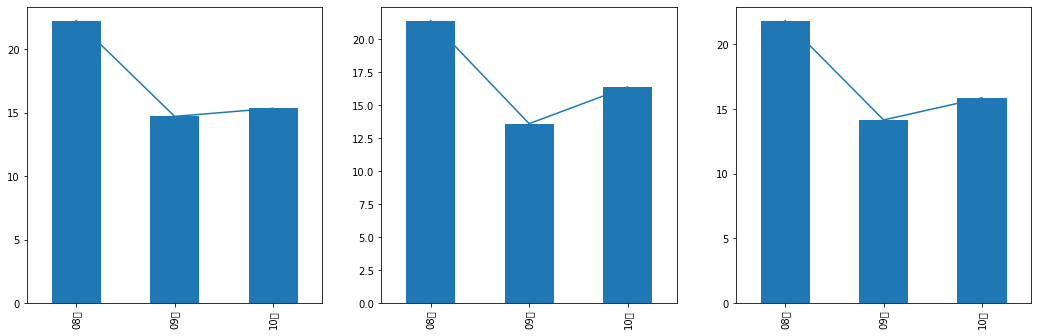

In [22]:
# 한강대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(hangang_month_4[["08시", "09시", "10시"]].mean())
print(hangang_month_4[["08시", "09시", "10시"]].mean().plot.bar())
plt.subplot(232)
plt.plot(hangang_month_5[["08시", "09시", "10시"]].mean())
print(hangang_month_5[["08시", "09시", "10시"]].mean().plot.bar())
plt.subplot(233)
plt.plot(hangang[["08시", "09시", "10시"]].mean())
print(hangang[["08시", "09시", "10시"]].mean().plot.bar())

In [23]:
# 동작대교의 결과 수치 확인
print(dongjak_month_4[["08시", "09시", "10시"]].mean())
print(dongjak_month_5[["08시", "09시", "10시"]].mean())
print(dongjak[["08시", "09시", "10시"]].mean())

08시    58.174286
09시    56.820714
10시    57.178571
dtype: float64
08시    62.823571
09시    60.338571
10시    60.656429
dtype: float64
08시    60.498929
09시    58.579643
10시    58.917500
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


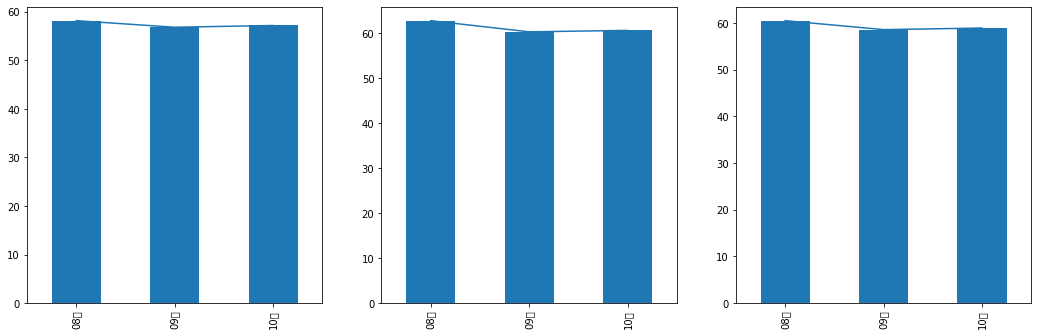

In [24]:
# 동작대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(dongjak_month_4[["08시", "09시", "10시"]].mean())
print(dongjak_month_4[["08시", "09시", "10시"]].mean().plot.bar())
plt.subplot(232)
plt.plot(dongjak_month_5[["08시", "09시", "10시"]].mean())
print(dongjak_month_5[["08시", "09시", "10시"]].mean().plot.bar())
plt.subplot(233)
plt.plot(dongjak[["08시", "09시", "10시"]].mean())
print(dongjak[["08시", "09시", "10시"]].mean().plot.bar())

In [25]:
# 반포대교의 결과 수치 확인
print(banpo_month_4[["08시", "09시", "10시"]].mean())
print(banpo_month_5[["08시", "09시", "10시"]].mean())
print(banpo[["08시", "09시", "10시"]].mean())

08시    50.641429
09시    46.371429
10시    48.383571
dtype: float64
08시    50.595000
09시    46.918571
10시    48.334286
dtype: float64
08시    50.618214
09시    46.645000
10시    48.358929
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


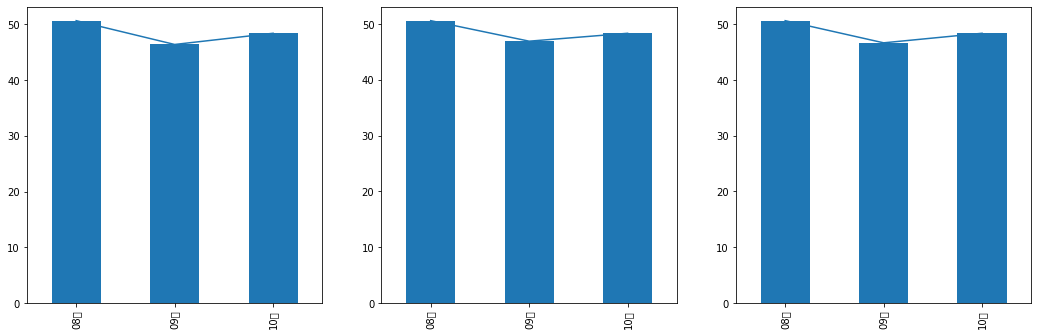

In [26]:
# 반포대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(banpo_month_4[["08시", "09시", "10시"]].mean())
print(banpo_month_4[["08시", "09시", "10시"]].mean().plot.bar())
plt.subplot(232)
plt.plot(banpo_month_5[["08시", "09시", "10시"]].mean())
print(banpo_month_5[["08시", "09시", "10시"]].mean().plot.bar())
plt.subplot(233)
plt.plot(banpo[["08시", "09시", "10시"]].mean())
print(banpo[["08시", "09시", "10시"]].mean().plot.bar())

In [27]:
# 한남대교의 결과 확인
print(hannam_month_4[["08시", "09시", "10시"]].mean())
print(hannam_month_5[["08시", "09시", "10시"]].mean())
print(hannam[["08시", "09시", "10시"]].mean())

08시    38.443571
09시    21.454286
10시    29.726429
dtype: float64
08시    36.323571
09시    19.769286
10시    28.860000
dtype: float64
08시    37.383571
09시    20.611786
10시    29.293214
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


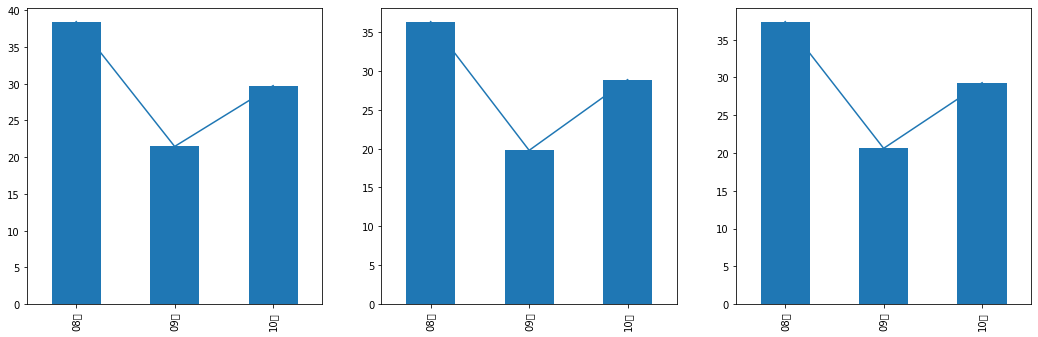

In [28]:
# 한남대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(hannam_month_4[["08시", "09시", "10시"]].mean())
print(hannam_month_4[["08시", "09시", "10시"]].mean().plot.bar())
plt.subplot(232)
plt.plot(hannam_month_5[["08시", "09시", "10시"]].mean())
print(hannam_month_5[["08시", "09시", "10시"]].mean().plot.bar())
plt.subplot(233)
plt.plot(hannam[["08시", "09시", "10시"]].mean())
print(hannam[["08시", "09시", "10시"]].mean().plot.bar())

In [30]:
df_month_4.to_csv("./speed/before.csv")
df_month_5.to_csv("./speed/after.csv")
data.to_csv("./speed/data.csv")
hangang.to_csv("./speed/hangang.csv")
dongjak.to_csv("./speed/dongjak.csv")
banpo.to_csv("./speed/banpo.csv")
hannam.to_csv("./speed/hannam.csv")